# Building a Feedforward Neural Network from Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

## Generate non-linearly separable data

(1000, 2) (1000,)


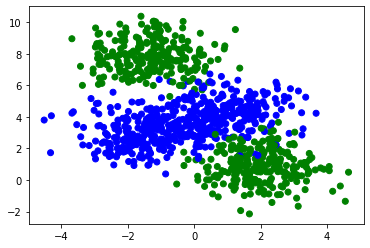

In [2]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","red","green"])

# generate data with 4 centers
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

# turn data into non-linearly separable data
labels = np.mod(labels, 2)
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

## Split the data

In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


## Build model inside a class called Sigmoid

In [4]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    # forward pass
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b

    def sigmoid_function(self, x):
        return 1.0/(1.0 + np.exp(-x))

    # backward pass using mean squared error loss
    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid_function(self.perceptron(x))
        return (y_pred - y)*(y_pred)*(1-y_pred)*x

    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid_function(self.perceptron(x))
        return (y_pred - y)*(y_pred)*(1-y_pred)
    
    # backward pass using cross entropy loss
    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid_function(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")

    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid_function(self.perceptron(x))
        if y == 0:
            return y_pred 
        elif y == 1:
            return -1 * (1 - y_pred)
        else:
            raise ValueError("y should be 0 or 1")

    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, loss_fn="mse", display_loss=False):
        if initialize: 
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        
        if display_loss:
            loss = {}

        for i in range(epochs):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x,y)
                    db += self.grad_b_mse(x,y)
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x,y)
                    db += self.grad_b_ce(x, y)
            
            m = X.shape[1]
            self.w -= learning_rate * (dw/m)
            self.b -= learning_rate * (db/m)

            if display_loss:
                Y_pred = self.sigmoid_function(self.perceptron(X))
                if loss_fn == "mse":
                    loss[i] = mean_squared_error(Y, Y_pred)
                elif loss_fn == "ce":
                    loss[i] = log_loss(Y, Y_pred)

        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            if loss_fn == "mse":
                plt.ylabel("Mean Squared Error")
            elif loss_fn == "ce":
                plt.ylabel("Log Loss")
            plt.show()

    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid_function(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)


## Create a class object

In [5]:
sn = SigmoidNeuron()

## Fit and predict on training and testing dataset

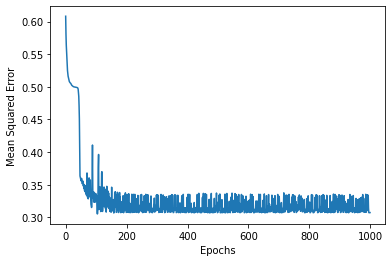

In [6]:
sn.fit(X_train, Y_train, epochs = 1000, learning_rate=0.5, display_loss=True)

preds = sn.predict(X_train)
pred_binary = (preds >= 0.5).astype("int").ravel()

preds_val = sn.predict(X_val)
pred_binary_val = (preds_val >= 0.5).astype("int").ravel()

## Find Accuracy

In [7]:
accuracy_train = accuracy_score(pred_binary, Y_train)
accuracy_val = accuracy_score(pred_binary_val, Y_val)
print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.68
Validation accuracy 0.65


## Visualize the results

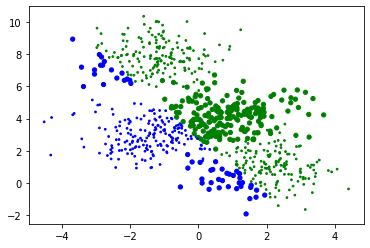

In [8]:
plt.scatter(X_train[:,0], X_train[:,1], c=pred_binary, cmap=my_cmap, s=15*(np.abs(pred_binary-Y_train)+.2))
plt.show()

Note that, small points indicate these observations are correctly classified and large points indicate these observations are miss-classified.

## Feedforward Neural Network

In [9]:
class FeedforwardNetwork:

    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
  
    def sigmoid_function(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self, x):
        #forward pass - preactivation and activation
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid_function(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid_function(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid_function(self.a3)
        return self.h3
    
    def grad(self, x, y):
        #back propagation
        self.forward_pass(x)
        
        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3)
        
        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
    
        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
        
    
    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, display_loss=False):
        
        # initialize w, b
        if initialize:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
        
        if display_loss:
            loss = {}
        
        for i in range(epochs):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                
            m = X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m
        
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
        
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
        
    def predict(self, X):
        #predicting the results on unseen data
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

## Fit and predict on training and testing dataset

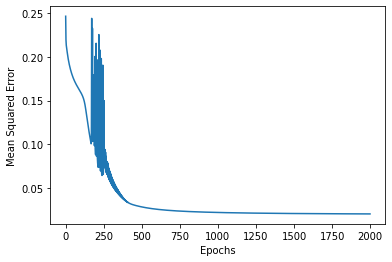

In [10]:
ffn = FeedforwardNetwork()

ffn.fit(X_train, Y_train, epochs=2000, learning_rate=.01, display_loss=True)

preds = ffn.predict(X_train)
preds_binary = (preds >= 0.5).astype("int").ravel()
preds_val = ffn.predict(X_val)
preds_binary_val = (preds_val >= 0.5).astype("int").ravel()

## Find Accuracy

In [11]:
accuracy_train = accuracy_score(preds_binary, Y_train)
accuracy_val = accuracy_score(preds_binary_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


## Visualize the results

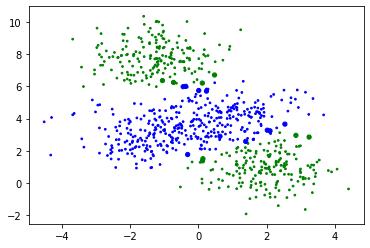

In [12]:
plt.scatter(X_train[:,0], X_train[:,1], c=preds_binary, cmap=my_cmap, s=15*(np.abs(preds_binary-Y_train)+.2))
plt.show()

As you can see most of the points are classified correctly by the neural network. The key takeaway is that just by combining three sigmoid neurons we are able to solve the problem of non-linearly separable data.

## Generic Class for Feedforward Neural Network

In [13]:
class GenericFeedforwardNetwork:
    def __init__(self, n_inputs, hidden_sizes=[2]):
        self.nx = n_inputs
        self.ny = 1
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        
        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
    def sigmoid_function(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh+1):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid_function(self.A[i+1])
        return self.H[self.nh+1]
  
    def grad_sigmoid(self, x):
        return x*(1-x) 
    
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
        if initialise:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))

        if display_loss:
            loss = {}
    
        for e in range(epochs):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
            
            m = X.shape[1]
            for i in range(self.nh+1):
                self.W[i+1] -= learning_rate * dW[i+1] / m
                self.B[i+1] -= learning_rate * dB[i+1] / m
        
            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = mean_squared_error(Y_pred, Y)
    
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
      
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()

## Fit and predict on training and testing dataset

In [14]:
# train the network with two hidden layers - 2 neurons and 3 neurons
gffn = GenericFeedforwardNetwork(2, [2, 3])

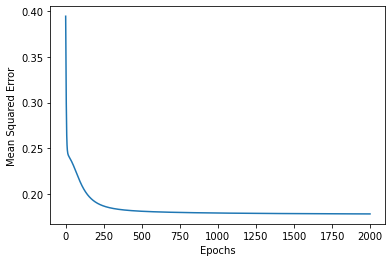

In [15]:
gffn.fit(X_train, Y_train, epochs=2000, learning_rate=.001, display_loss=True)


## Find Accuracy

In [16]:
preds = gffn.predict(X_train)
preds_binary = (preds >= 0.5).astype("int").ravel()
preds_val = gffn.predict(X_val)
preds_binary_val = (preds_val >= 0.5).astype("int").ravel()

accuracy_train = accuracy_score(preds_binary, Y_train)
accuracy_val = accuracy_score(preds_binary_val, Y_val)
print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.73
Validation accuracy 0.72


## Visualize the results

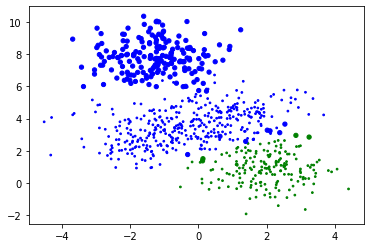

In [17]:
plt.scatter(X_train[:,0], X_train[:,1], c=preds_binary, cmap=my_cmap, s=15*(np.abs(preds_binary-Y_train)+.2))
plt.show()

From the plot, we see that the loss function falls a bit slower than the previous network because in this case, we have two hidden layers with 2 and 3 neurons respectively. 
Because it is a large network with more parameters, the learning algorithm takes more time to learn all the parameters and propagate the loss through the network.

## Generic FF Class for Multi-Class Classification

We will extend our generic function written in the previous section to support multi-class classification. Before we proceed to build our generic class, we will create new data and do some 
data preprocessing.

Here we have 4 different classes, so we encode each label so that the machine can understand and do computations on top it. To encode the labels, we will use `sklearn.OneHotEncoder` 
on training and validation labels.

(1000, 2) (1000,)


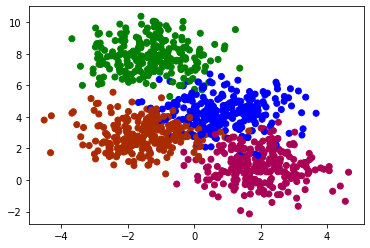

In [18]:
my_cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","red","green"])

# generate data with 4 centers
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap2)
plt.show()

In [19]:
#split that data into train and val
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

#one hot encoder
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 2) (250, 2) (1000,)
(750, 4) (250, 4)


In [20]:
class FeedforwardNetworkMultiClass:
    def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
        self.nx = n_inputs
        self.ny = n_outputs
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny] 

        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps)

    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
        self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
        return self.H[self.nh+1]
  
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()
 
    def grad_sigmoid(self, x):
        return x*(1-x) 
  
    def cross_entropy(self,label,pred):
        yl=np.multiply(pred,label)
        yl=yl[yl!=0]
        yl=-np.log(yl)
        yl=np.mean(yl)
        return yl
 
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
    def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
        if display_loss:
            loss = {}
      
        if initialize:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
        for epoch in range(epochs):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
                  
            m = X.shape[1]
            for i in range(self.nh+1):
                self.W[i+1] -= learning_rate * (dW[i+1]/m)
                self.B[i+1] -= learning_rate * (dB[i+1]/m)
            
            if display_loss:
                Y_pred = self.predict(X) 
                loss[epoch] = self.cross_entropy(Y, Y_pred)
    
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('CE')
            plt.show()

## Fit and predict on training and testing dataset

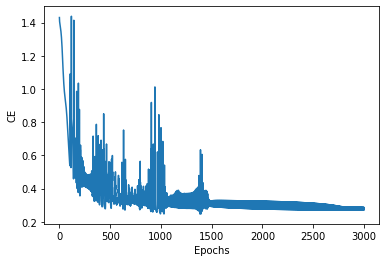

In [21]:
ffn_multi = FeedforwardNetworkMultiClass(2,4,[2,3])
ffn_multi.fit(X_train,y_OH_train,epochs=3000,learning_rate=.005,display_loss=True)

## Find Accuracy

In [22]:
preds = ffn_multi.predict(X_train)
preds = np.argmax(preds,1)

preds_val = ffn_multi.predict(X_val)
preds_val = np.argmax(preds_val,1)

accuracy_train = accuracy_score(preds, Y_train)
accuracy_val = accuracy_score(preds_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.89
Validation accuracy 0.9


## Visualize the results

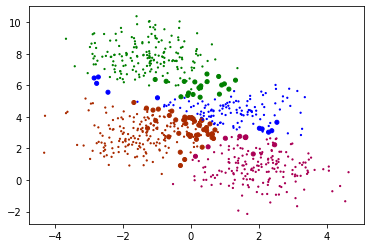

In [23]:
plt.scatter(X_train[:,0], X_train[:,1], c=preds, cmap=my_cmap, s=15*(np.abs(np.sign(preds-Y_train))+.1))
plt.show()